In [1]:
import pandas as pd
import s3fs

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
source = "s3://alexaevafernando/botsct.csv"
df = pd.read_csv(source)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [3]:
df.head()

Unnamed: 0                         timestamp      X      Y pixel_color  \
0        1874  2023-07-24 15:48:08.598000+00:00  701.0 -984.0     #000000   
1        1875  2023-07-24 15:52:11.729000+00:00 -877.0 -995.0     #000000   
2        1876  2023-07-24 16:01:01.221000+00:00 -840.0 -989.0     #FF4500   
3        1877  2023-07-24 16:05:16.280000+00:00 -871.0 -994.0     #FF4500   
4        1878  2023-07-24 16:09:18.463000+00:00 -878.0 -986.0     #9C6926   

   user               time_diff  time_diff_min  session_id  count  
0   112  0 days 00:48:56.936000      48.933333         687     66  
1   112  0 days 00:04:03.131000       4.050000         687     66  
2   112  0 days 00:08:49.492000       8.816667         687     66  
3   112  0 days 00:04:15.059000       4.250000         687     66  
4   112  0 days 00:04:02.183000       4.033333         687     66

In [4]:
#changing timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df.dtypes

Unnamed: 0                     int64
timestamp        datetime64[ns, UTC]
X                            float64
Y                            float64
pixel_color                   object
user                           int64
time_diff                     object
time_diff_min                float64
session_id                     int64
count                          int64
dtype: object

In [5]:
#calculating the overall length of time of a session, then merging it back into the dataframe
timecalcs = df.groupby('session_id')['timestamp'].apply(lambda x: x.max() - x.min()).reset_index(name='length')

In [6]:
df = df.merge(timecalcs, how = 'left', on='session_id')

In [7]:
df.head(10)

Unnamed: 0                        timestamp       X      Y pixel_color  \
0        1874 2023-07-24 15:48:08.598000+00:00   701.0 -984.0     #000000   
1        1875 2023-07-24 15:52:11.729000+00:00  -877.0 -995.0     #000000   
2        1876 2023-07-24 16:01:01.221000+00:00  -840.0 -989.0     #FF4500   
3        1877 2023-07-24 16:05:16.280000+00:00  -871.0 -994.0     #FF4500   
4        1878 2023-07-24 16:09:18.463000+00:00  -878.0 -986.0     #9C6926   
5        1879 2023-07-24 16:13:19.890000+00:00  -851.0 -988.0     #FFD635   
6        1880 2023-07-24 16:17:51.277000+00:00  -873.0 -982.0     #493AC1   
7        1881 2023-07-24 16:21:59.854000+00:00  -879.0 -993.0     #FF4500   
8        1882 2023-07-24 16:26:11.045000+00:00  -877.0 -995.0     #FF4500   
9        1883 2023-07-24 16:30:17.482000+00:00 -1244.0 -940.0     #FFFFFF   

   user               time_diff  time_diff_min  session_id  count  \
0   112  0 days 00:48:56.936000      48.933333         687     66   
1   112  0 days 00:04:03.131000       4.050000         687     66   
2   112  0 days 00:08:49.492000       8.816667         687     66   
3   112  0 days 00:04:15.059000       4.250000         687     66   
4   112  0 days 00:04:02.183000       4.033333         687     66   
5   112  0 days 00:04:01.427000       4.016667         687     66   
6   112  0 days 00:04:31.387000       4.516667         687     66   
7   112  0 days 00:04:08.577000       4.133333         687     66   
8   112  0 days 00:04:11.191000       4.183333         687     66   
9   112  0 days 00:04:06.437000       4.100000         687     66   

                  length  
0 0 days 05:04:29.008000  
1 0 days 05:04:29.008000  
2 0 days 05:04:29.008000  
3 0 days 05:04:29.008000  
4 0 days 05:04:29.008000  
5 0 days 05:04:29.008000  
6 0 days 05:04:29.008000  
7 0 days 05:04:29.008000  
8 0 days 05:04:29.008000  
9 0 days 05:04:29.008000

In [8]:
#filtering by sessions that lasted longer than 16 hours
lengthfilter = df[df['length'] > pd.Timedelta(hours=16)]

In [9]:
longusers= lengthfilter['user'].unique()
long = df[df['user'].isin(longusers)]

In [10]:
#len(lengthfilter['user'].unique())
len(df['user'].unique())


118973

In [11]:
len(long['user'].unique())


2766

In [11]:
#lengthfilter.head()

In [12]:
import matplotlib.pyplot as plt

In [13]:
#lengthfilter['timestamp'].max()
df['timestamp'].max()

Timestamp('2023-07-25 21:38:35.864000+0000', tz='UTC')

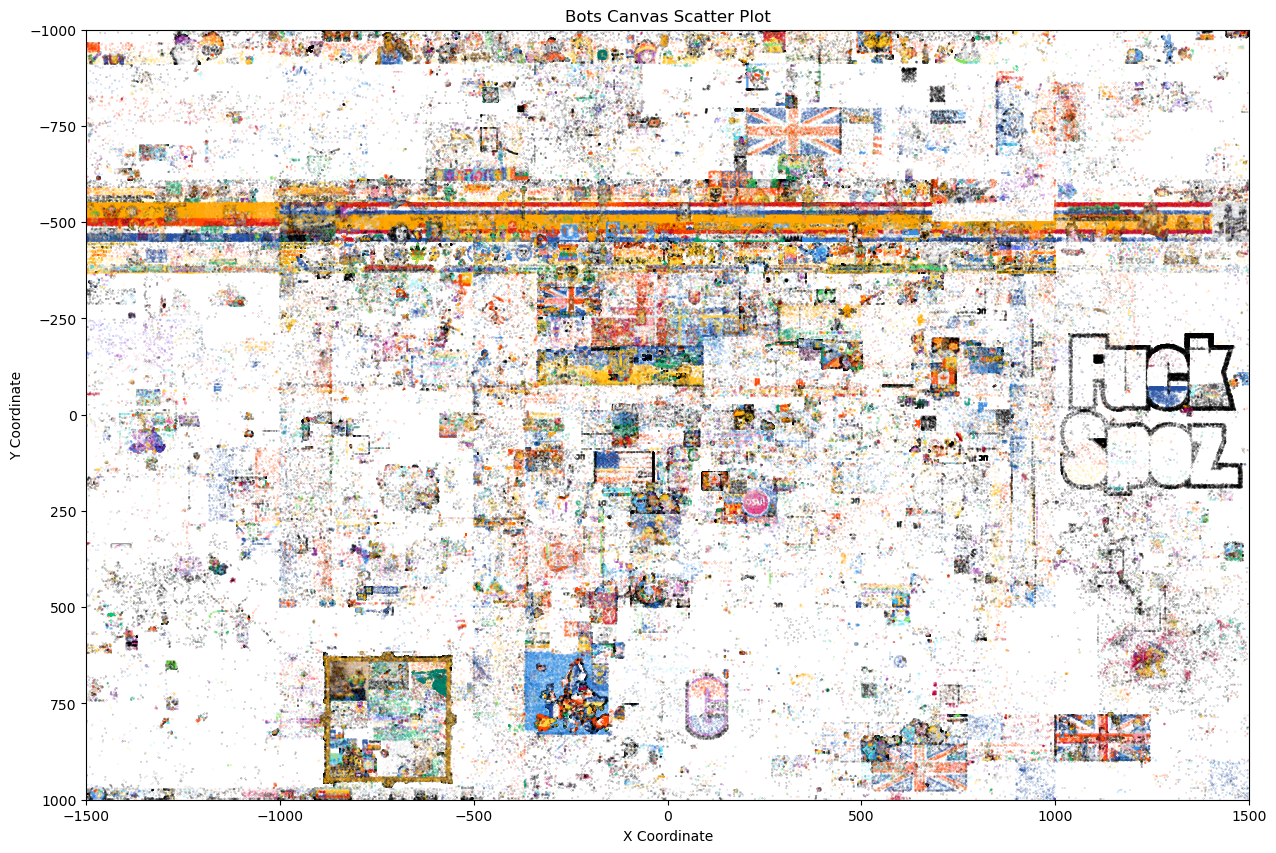

In [14]:
#filtered by only users with all bot requirements
plt.figure(figsize=(15, 10))
plt.scatter(long['X'], long['Y'], c=long['pixel_color'], s=0.01)

plt.xlim(-1500, 1500)
plt.ylim(1000, -1000)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bots Canvas Scatter Plot')
plt.savefig('canvas.png', format='png')

plt.show()


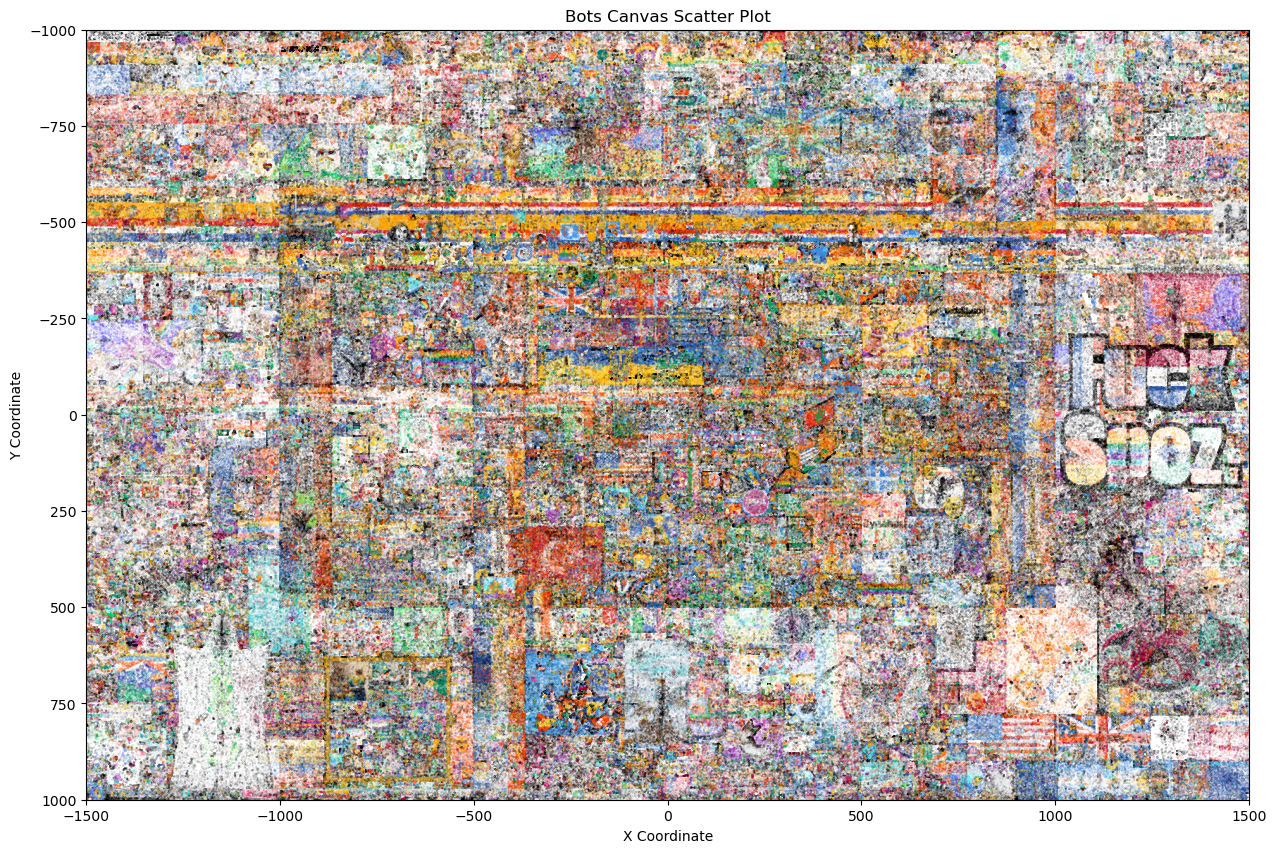

In [15]:
#not filtered by session length
plt.figure(figsize=(15, 10))
plt.scatter(df['X'], df['Y'], c=df['pixel_color'], s=0.01)

plt.xlim(-1500, 1500)
plt.ylim(1000, -1000)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bots Canvas Scatter Plot')
plt.savefig('OtherCanvas.png', format='png')

plt.show()